In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/bhavy/Downloads/EV Stats-1.csv")


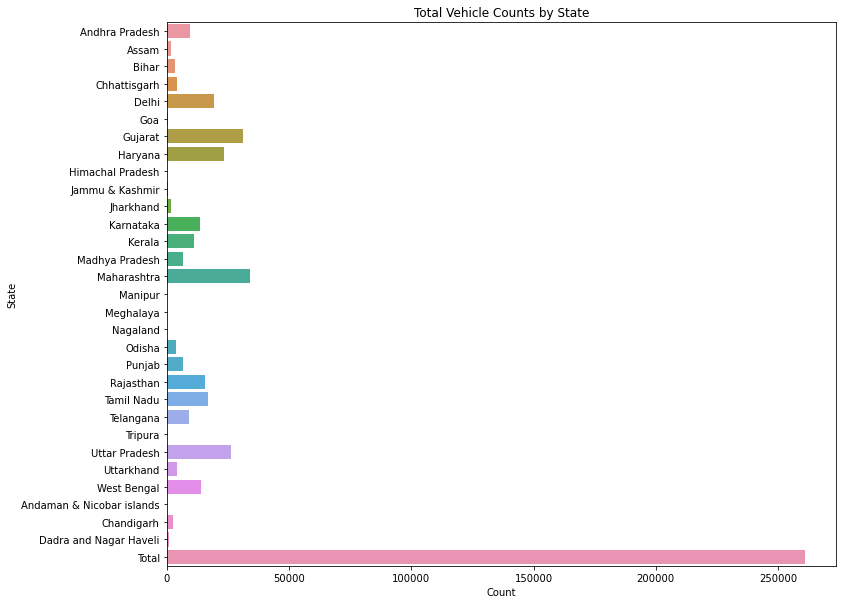

In [6]:
# Analysis 1: Total Vehicle Counts by State (Bar Plot)
plt.figure(figsize=(12, 10))
sns.barplot(data=df, y='State', x='Total in state')
plt.title('Total Vehicle Counts by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

C:\Users\bhavy\AppData\Local\Temp\ipykernel_1452\526519258.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Automatically adjust the subplot parameters to avoid overlap


<Figure size 720x432 with 0 Axes>

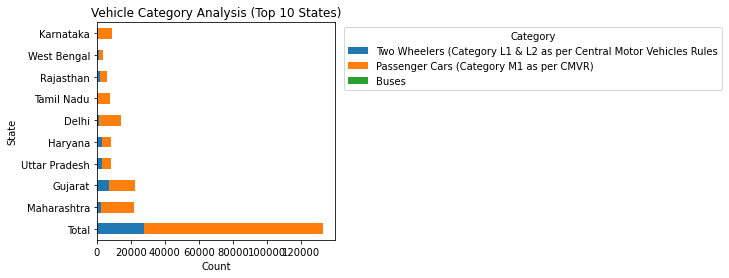

In [23]:
# Analysis 2: Vehicle Category Analysis (Horizontal Bar Plot)
top_10_states = df.nlargest(10, 'Total in state')

df_category = top_10_states[['State', 'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                             'Three Wheelers (Category L5 slow speed as per CMVR)',
                             'Passenger Cars (Category M1 as per CMVR)', 'Buses']]

plt.figure(figsize=(10, 6))
df_category.set_index('State').plot(kind='barh', stacked=True)
plt.title('Vehicle Category Analysis (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(left=0.25, right=0.8)  # Adjust the left and right margins
plt.tight_layout()  # Automatically adjust the subplot parameters to avoid overlap
plt.show()




C:\Users\bhavy\AppData\Local\Temp\ipykernel_1452\4127120257.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  power_counts = df[power_columns].sum()


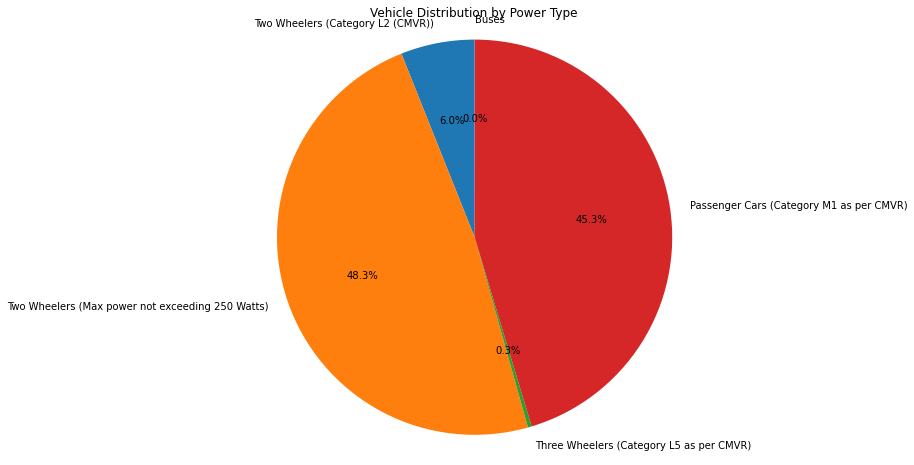

In [24]:
# Analysis 3: Vehicle Distribution by Power Type (Pie Chart)
power_columns = ['Two Wheelers (Category L2 (CMVR))', 'Two Wheelers (Max power not exceeding 250 Watts)',
                 'Three Wheelers (Category L5 slow speed as per CMVR)', 'Three Wheelers (Category L5 as per CMVR)',
                 'Passenger Cars (Category M1 as per CMVR)', 'Buses']

power_counts = df[power_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(power_counts, labels=power_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Vehicle Distribution by Power Type')
plt.axis('equal')
plt.show()

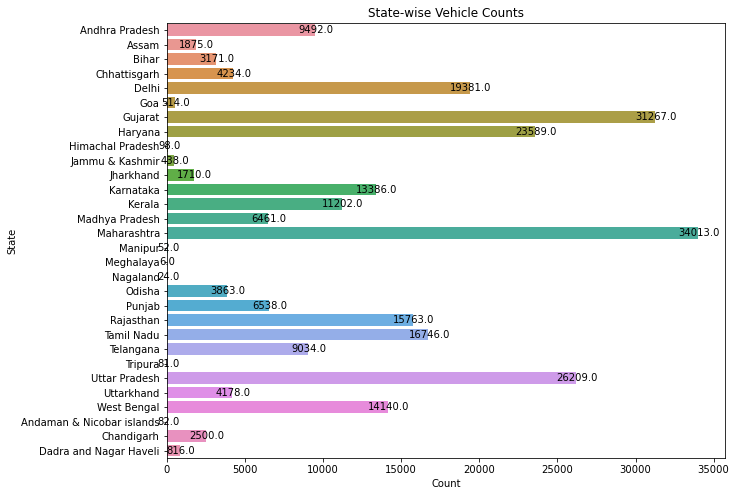

In [28]:
# Analysis 4: State-wise Vehicle Counts (Horizontal Bar Plot)
plt.figure(figsize=(10, 8))
df_without_total = df[df['State'] != 'Total']
ax = sns.barplot(data=df_without_total, y='State', x='Total in state')
plt.title('State-wise Vehicle Counts')
plt.xlabel('Count')
plt.ylabel('State')

# Add count values to each bar
for p in ax.patches:
    count = p.get_width()
    ax.annotate(count, (count + 50, p.get_y() + p.get_height() / 2), ha='center', va='center')

plt.show()



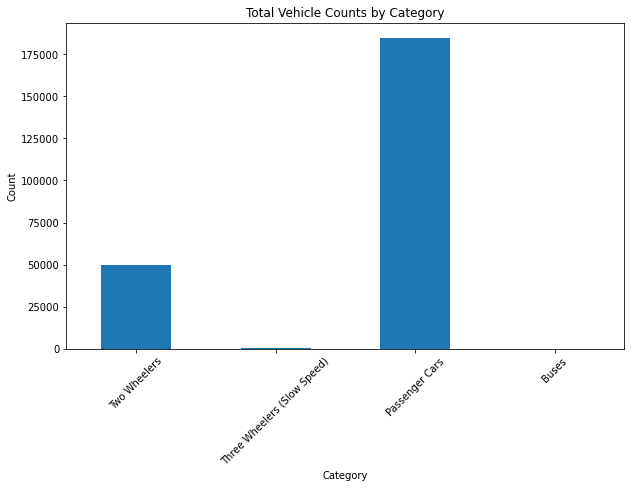

In [33]:
# Analysis 5: Total Vehicle Counts by Category (Stacked Bar Plot)
df_category_numeric = df_category.drop('State', axis=1).apply(pd.to_numeric, errors='coerce')

# Define aliases for category names
category_aliases = {
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': 'Two Wheelers',
    'Three Wheelers (Category L5 slow speed as per CMVR)': 'Three Wheelers (Slow Speed)',
    'Passenger Cars (Category M1 as per CMVR)': 'Passenger Cars',
    'Buses': 'Buses'
}

# Rename columns with aliases
df_category_numeric.rename(columns=category_aliases, inplace=True)

category_counts = df_category_numeric.sum()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', stacked=True)
plt.title('Total Vehicle Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


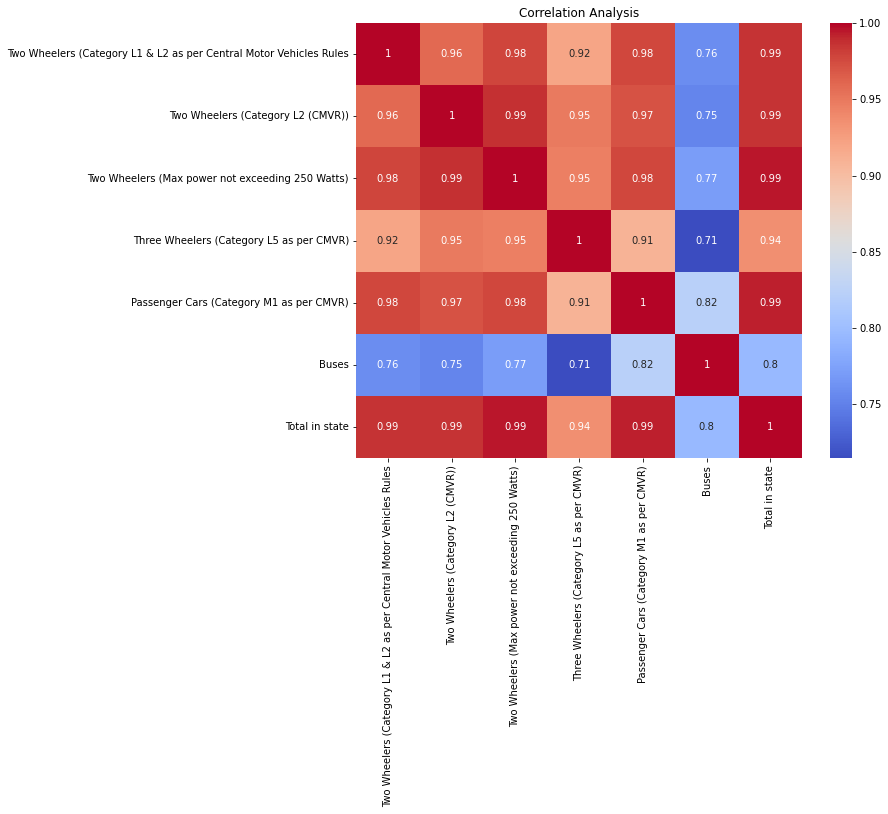

In [34]:
# Analysis 6: Correlation Analysis (Heatmap)
correlation = df.drop(['Sl. No'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()